$
\def\E#1{\mathbb{E}\left[#1\right]}
$

In [145]:
import pandas as pd 
import seaborn as sn
import numpy as np
import scipy.stats as stats

In [146]:
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [147]:
%matplotlib inline

In [148]:
from IPython.display import HTML
import random

def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'

    toggle_text = 'Toggle show/hide'  # text shown on toggle link
    target_cell = this_cell  # target cell to control with toggle
    js_hide_current = ''  # bit of JS to permanently hide code in current cell (only when toggling next cell)

    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'

    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))

    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
                {cell_selector}.find('div.output').toggle();
                {cell_selector}.find("div.inner_cell").toggle();
            }}

            {js_hide_current}
            
        </script>

        <a href="javascript:{f_name}() ">{toggle_text}</a>
        <div id="collapsed" class="fa fa-plus-square-o" style="margin-left:102px;padding-top:5px" onclick="collapseToggle(this)" > 
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )

    return HTML(html)

# Notes de cours -- Panorama de probabilités <a class="tocSkip">

L'objectif de ce petit cours est de rappeler des éléments essentiels de probabilités et de statistiques, utiles pour la culture générale de l'ingénieur comme pour les datasciences. Ces notes seront présentées en s'appuyant sur des illustrations dans le notebook.  

**Bibliographie (par exemple)**

- S. Kotz, N. Balakrishnan, C. B. Read, and B. Vidakovic, Eds., Encyclopedia of statistical sciences, 2nd ed. Hoboken, N.J: Wiley-Interscience, 2006.
- D. P. Bertsekas and J. N. Tsitsiklis, Introduction to probability, Second edition. Belmont, Massachusetts: Athena Scientific, 2008.
- K. P. Murphy, Machine learning: a probabilistic perspective. Cambridge, MA: MIT Press, 2012.
- A. DasGupta, Probability for Statistics and Machine Learning. New York, NY: Springer New York, 2011.
- J. Unpingco, Python for Probability, Statistics, and Machine Learning. Cham: Springer International Publishing, 2016.
- C. S. Forbes, Ed., Statistical distributions: Catherine Forbes ... [et al.], 4th ed. Hoboken, N.J: Wiley, 2011.


# Variables aléatoires, probabilités, densités

- variables aléatoires continues, discrètes
- fonction de répartition
- distribution de probabilité
- probabilité
- densité continue
- quartiles
- percentiles
- histogramme
- box plot

## Variables aléatoires

Une variable aléatoire discrète est une fonction qui associe un événéement à une valeur, suivant une proba donnée. 
Ainsi, pour une variable de Bernoulli, on a deux valeurs possibles, de probabilités $p$ et $1-p$.

In [149]:
stats.bernoulli(p=0.2).rvs()

0

In [150]:
# 100 fois
stats.bernoulli(p=0.2).rvs(100)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

Une autre variable (Poisson), prenant ses valeurs sur tout $\mathbb{N}$. 

In [151]:

stats.poisson(mu=1).rvs()

1

In [152]:
# 100 fois
stats.poisson(mu=2).rvs(100)

array([2, 3, 3, 1, 3, 2, 5, 1, 2, 0, 0, 1, 0, 3, 0, 2, 1, 1, 1, 1, 2, 4,
       6, 0, 2, 5, 3, 2, 1, 2, 1, 2, 2, 1, 0, 0, 0, 1, 1, 3, 1, 1, 2, 1,
       0, 1, 6, 0, 1, 2, 2, 2, 0, 0, 4, 2, 1, 0, 1, 3, 0, 0, 2, 4, 2, 2,
       4, 2, 1, 2, 1, 2, 3, 1, 1, 4, 4, 4, 2, 2, 2, 3, 2, 1, 3, 2, 4, 4,
       2, 2, 1, 1, 3, 4, 3, 2, 2, 0, 3, 1])

Et il y a aussi des variables qui prennent des valeurs sur un intervalle ou sur tout $\mathbb{R}$, voire sur $\mathbb{R}^N$

In [153]:
stats.arcsine().rvs(20)

array([0.91138789, 0.92064991, 0.01708538, 0.46138711, 0.99474529,
       0.99999339, 0.21918115, 0.88884298, 0.74993117, 0.9978013 ,
       0.1762477 , 0.80694993, 0.03305729, 0.6706636 , 0.0499399 ,
       0.97170864, 0.98938286, 0.34083993, 0.9944927 , 0.11872054])

In [154]:
stats.cauchy().rvs(20)

array([-1.09152297e+00, -5.26438978e-01,  4.44492806e-01,  1.75815645e+00,
        3.50976750e+00, -5.70329277e-04, -7.80299037e-01,  4.30169872e-01,
       -3.48890172e-01,  6.48522577e-01, -4.03227234e-01,  1.35515677e+00,
        3.61399987e+00,  1.11025768e+00,  1.19825800e-01,  2.79029204e+00,
       -1.43290102e+00, -4.09637685e+00, -9.67950509e-01,  7.59458181e-02])

Ensuite, étant donnés les résultats d'un "tirage", _un échantillon statistique_, on peut de représenter les "distributions de probabilité" et essayer d'*estimer* des paramètres liés à ces distributions. 

Pour des variables à valeurs discrètes, on peut estimer la "pmf" *probability mass function* ; pour une variable de Bernoulli, on aura par exemple 

<StemContainer object of 3 artists>

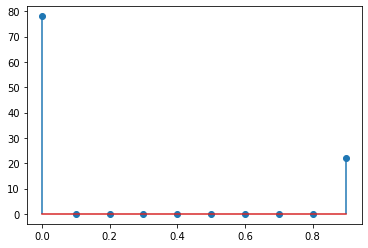

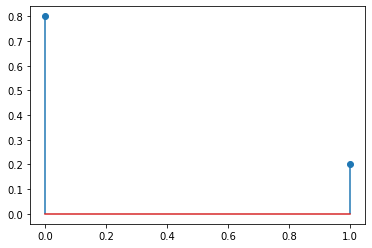

In [155]:
v = stats.bernoulli(p=0.2).rvs(100)
x = np.arange(10)/10
pmf = stats.bernoulli(p=0.2).pmf([0,1])
xx, yy = np.histogram(v)

plt.stem(x, xx)
plt.figure()
plt.stem([0,1], pmf)

Pour des variables à valeurs continues, on construit une variable discrète en subdivisant le support en intervalles et en comptant le nombre de fois où la variable intervient à chaque intervalle. 

La représentation correspondante est appelée un **histogramme**

In [156]:
v = stats.norm().rvs(200)

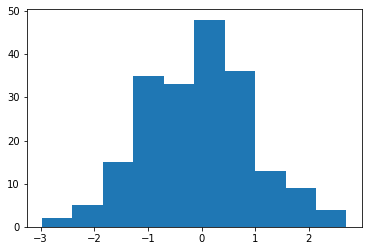

In [157]:
_ = plt.hist(v)

On peut y superposer la *densité de probabilité*

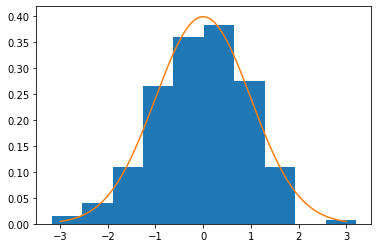

In [158]:
plt.hist(stats.norm().rvs(200), density=True) # bins=100
x = np.linspace(-3,3, 200)
plt.plot(x, stats.norm().pdf(x))

La **densité de probabilité** est la fonction, qui lorsqu'on l'intègre entre deux bornes, fournit la probabilité que la variable appartienne à cet intervalle. 

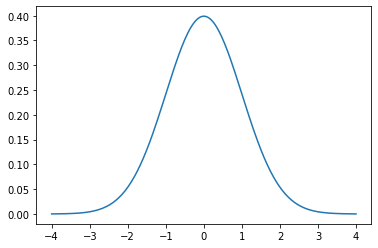

In [159]:
x = np.linspace(-4,4, 200)
plt.plot(x, stats.norm().pdf(x))

**Exercice (papier)**
Soit une variable uniforme sur l'intervalle $[0,5]$. 
Que vaut la probabilité d'être dans l'intervalle 
- [1,2] ?
- [2,3] ?
- [2,4] ?
- [4,6] ?

La **fonction de répartition** (cdf : *cumulative distribution function* ) est la donction définie par 
$$
F_X(x) = Pr(X<x) 
$$
c'est donc aussi
$$
F_X(x) = \int_{-\infty}^x p_X(t) dt
$$
ou
$$
p_X(x) = \frac{F_X(x)}{dx}
$$

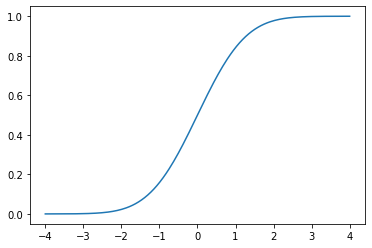

In [160]:
v = stats.norm().pdf(x)
plt.plot(x, stats.norm().cdf(x))

**Question**  La fonction de répartition est-elle toujours croissante ? si oui pourquoi, si non contre exemple

**Exercice (papier)** Tracer la fonction de répartion d'une loi uniforme sur (0,1]

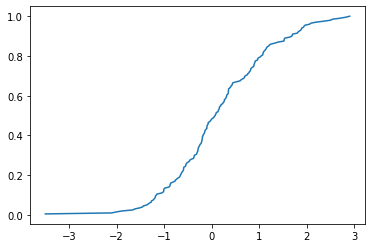

In [161]:
# Estimation de la fonction de répartition
N = 200
v = stats.norm().rvs(N)
plt.plot(sorted(v), np.cumsum(np.ones_like(v))/N)  #< --- !!! 

- moments d'une VA
- (cumulants)
- moyenne, variance, estimation de l'une et de l'autre

## Moments

On appelle *moment d'ordre $n$* d'une variable aléatoire la quantité suivante
$$
\E{X^n} = \int x^n p_X(x) dx 
$$
pour des variables continues, et 
$$
\E{X^n} = \sum_i x_i^n p_X(x_i) 
$$
pour des variables discrètes. 

Un des intérêts des moments, outre leur signifcation physique ou statistique (moyenne, variance, dissymétrie, applatissement) est, *s'ils existent*, qu'ils permettent de décrire parfaitement la distribution de probabilité. En effet, 
$$
\E{e^{tX}} = \int e^{tx} p_X(t) dx = TL\{p_X(x)\} = \sum_{k=0}^\infty \frac{t^n}{n!} \E{X^n}
$$
où TL désigne la transformée de Laplace, et où la somme provient du développement en série de l'exponentielle. Ainsi, la connaissance de tous les moments nous donne accès à la transformée de Laplace de la densité de proba, donc à la densité de probabilité. Des relations similaires s'étabilssent pour des VA discrètes. 

## Estimation d'un moment 

Pour estimer un moment d'ordre quelconque, on utilise le fait que les fréquences empiriques tendent vers les probabilités (c'est la loi des grands nombres -- vor plus bas). Ainsi, si on dispose d'un $N$ échantillon de variables aléatoires pouvant prendre $K$ valeurs discrètes $d_k$ avec des probabilités $p_k$, alors
$$
\hat{p_i} = \frac{n_i}{N} \rightarrow p_i
$$
où $n_k$ est le nombre d'occurence des observations de valeur $d_i$.
Le moment s'approche alors comme
$$
\E{X^n} \simeq \sum_{k=1}^K \frac{n_k}{N} d_k^n
$$
Or, si on considère la somme
$$
\sum_{i=1}^N x_i^n = x_1^n + x_2^n + \ldots x_N^n
$$
on voit que cette somme fera apparaître les $K$ valeurs possibles, et comportera par exmple $n_k$ fois la valeur $d_k$. Ainsi, cete somme s'écrira également 
$$
\sum_{k=1}^K n_k d_k^n
$$
Il ne reste plus qu'à diviser par $N$ pour obtenir 
$$
\E{X^n} \simeq \frac{1}{N} \sum_{i=1}^N x_i^n = \sum_{k=1}^K \frac{n_k}{N} d_k^n
$$

**Exercice (machine)**
Soit x une variable uniforme sur $[0,1]$ dont on tire un échantillon de 100 valeurs. Calculer numériquement les moments d'ordre 1 et 2. Utiliser `stats.uniform().rvs()` pour générer l'échantillon statistique. 

**Exemple**

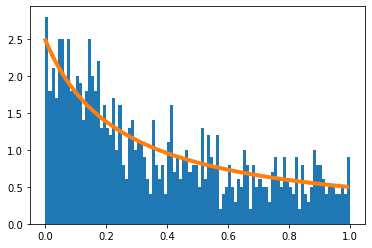

In [162]:
b = stats.distributions.bradford(4)
x = b.rvs(1000)
plt.hist(x,100, density=True)
xx = np.arange(0,1, 0.01)
plt.plot(xx, b.pdf(xx), linewidth=4)

In [163]:
b = stats.distributions.bradford(4)
x = b.rvs(100)
b.stats('ms')

(array(0.37133493), array(0.54822261))

In [164]:
np.mean(x)

0.38505248402700315

Un moment estimé est une variable aléatoire !


In [165]:
x = b.rvs(100)
np.mean(x)

0.38678866571461834

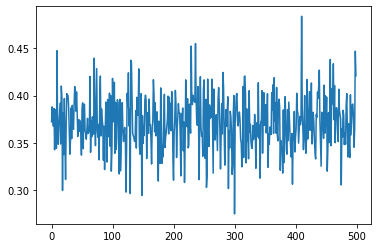

In [166]:
m = np.empty(500)
for rea in range(500):
    x = b.rvs(100)
    m[rea] = np.mean(x)
plt.plot(m)    

Text(0.5, 1.0, 'Histogramme de la moyenne estimée')

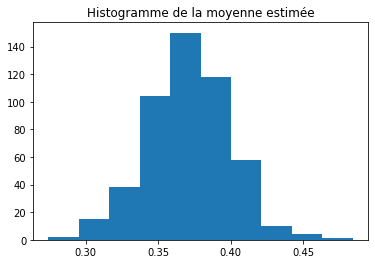

In [167]:
plt.hist(m)
plt.title("Histogramme de la moyenne estimée")

**Variance** La variance est un moment particulier, qui est construit comme le moment d'ordre 2 des écarts à la moyenne. En d'autres termes, on "centre" la variable -- on lui retire sa moyenne, et on calcule ensuite le moment d'ordre 2. La variance mesure alors une tendance à la dispersion autour de la moyenne. 

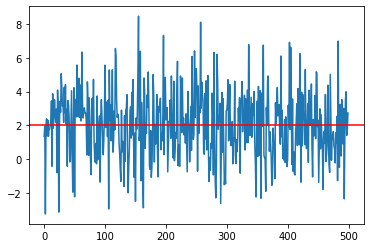

In [168]:
b = stats.distributions.norm(2,2)   #distributions.bradford(4)
N = 500
x = b.rvs(N)
plt.plot(x)
plt.axline([0, np.mean(x)], [N, np.mean(x)], color='r')

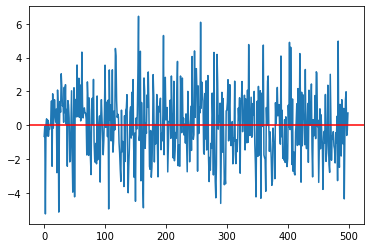

In [169]:
xc = x - np.mean(x)
plt.plot(xc)
plt.axline([0, np.mean(xc)], [N, np.mean(xc)], color='r')

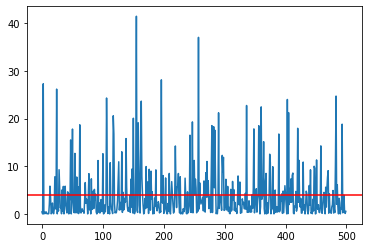

In [170]:
xc = x - np.mean(x)
plt.plot(xc**2)
plt.axline([0, np.mean(xc**2)], [N, np.mean(xc**2)], color='r')

In [171]:
b.stats('v')

array(4.)



# Couples de variables aléatoires 
- densité jointe / distribution jointe
- moments croisés
- corrélation, définition, estimation
- coefficient de corrélation
- scatterplots
- corrélation et régression linéaire
- corrélation et indépendance
- probabilité conditionnelle
- règle de Bayes
- règle de Bayes pour des variables continues

## Densité jointe

Pour un couple de variables aléatoires, $x_1$, $x_2$, la loi du couple est donnée par la loi jointe
$$
p_{X_1, X_2}(x_1, x_2),
$$
ce qui s'étend bien sûr au cas de $N$ variables avec la loi jointe à $N$ variables. 
Les $N$ variables pouront être collectées dans un vecteur $\mathbf{x}$, et la loi jointe sera notée $p_{\mathbf{X}}(\mathbf{x})$. 

## Moments croisés, covariance et corrélation

Pour deux variables (ou plus), en plus des moments de chacune des variables, on pourra définir tout un tas de moments croisés ; et notamment les notions de *corrélation* et de *covariance*. 

Pour deux variables, le moment croisé (non centré) est la corrélation. Lorsqu'on s'intéresse aux variables centrées, on a la covariance. 

Si $x$ et $y$ sont ces deux variables, la corrélation est définie comme
$$
R_{X,Y} = \E{XY}
$$
et covariance par 
$$
\sigma_{XY} = R_{X,Y} = \E{(X-\mu_X)(Y-\mu_Y)}
$$
On note 
$$
\sigma_{X}^2 = R_{X,X} = \E{(X-\mu_X)^2}
$$
la *variance* de $X$. 

Le *coefficient de corrélation* (de Pearson) est défini par $\rho_{X,Y}$ tel que
$$
\rho_{X,Y}^2 = \frac{\sigma_{XY}}{\sigma_X^2\sigma_Y^2} 
$$
le moment croisé normalisé par le produit des moments d'ordre 2 des deux variables mises en jeu. 
Par l'inégalite de Cauchy-Schwarz, on montre que $\rho_{X,Y}^2\leq 1$, et que par suite $|\rho_{X,Y}|\leq 1$. 

La densité gaussienne multivariée est définie par

$$
f(x) = \frac{1}{\sqrt{(2 \pi)^k \det \Sigma}}
           \exp\left( -\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu) \right),
$$           

où $\mu$ est la moyenne et $\Sigma$ la matrice de covariance, et $k$ la dimension. 

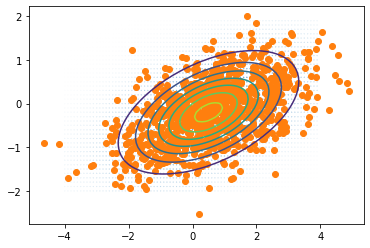

In [172]:
x, y = np.mgrid[-4:4:.1, -2:2:.1]
pos = np.dstack((x, y))
rv = stats.multivariate_normal([0.5, -0.2], [[2.0, 0.5], [0.5, 0.5]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(x, y, rv.pdf(pos))
vars = rv.rvs(1000)
ax2.scatter(x, y, rv.pdf(pos))
ax2.scatter(vars[:,0], vars[:,1])

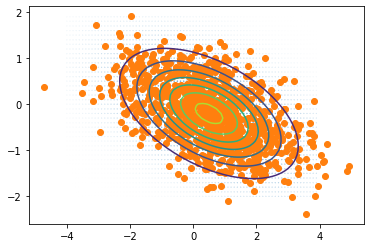

In [173]:
x, y = np.mgrid[-4:4:.1, -2:2:.1]
pos = np.dstack((x, y))
rv = stats.multivariate_normal([0.5, -0.2], [[2.0, -0.5], [-0.5, 0.5]])
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contour(x, y, rv.pdf(pos))
vars = rv.rvs(1000)
ax2.scatter(x, y, rv.pdf(pos))
ax2.scatter(vars[:,0], vars[:,1])

## Corrélation et régression linéaire

On se souvient que le coefficient de corrélation est aussi la pente de la meilleur droite de régression entre les deux variables. 

Si on pose que $\hat Y=aX+b$, alors le meilleur jeu de coefficients $(a,b)$ minimisant l'écart quadratique entre $\hat Y$ et $Y$ et donné par le minimum de
$$
\text{min}_{a,b} \E{(\hat Y - Y)^2}
$$
Or 
$$
\frac{d}{d*} \E{(\hat Y - Y)^2} =  \E{2(\hat Y - Y) \frac{d}{d*} (\hat Y - Y)}
$$
Pour $a$, ceci conduit à
$$
\E{(aX+b - Y) \frac{d}{da} (aX+b - Y)} = \E{(aX+b - Y) X } = a\E{X^2} + b\E{X} - \E{XY} = 0
$$
et pour $b$ à
$$
\E{(aX+b - Y) \frac{d}{db} (aX+b - Y)} = \E{(aX+b - Y) } = a\E{X} + b - \E{Y} = 0
$$
De la seconde relation, on déduit $ b = \E{Y} - a\E{X}$, ce qui, réinjecté dans la premiière relation, fournit
$$
a\E{X^2} + (\E{Y} - a\E{X})\E{X} - \E{XY} = 0 
$$
$$
a\E{X^2} + (\E{Y}\E{X} - a\E{X}\E{X}) - \E{XY} = 0
$$
$$
a(\E{X^2}-\E{X^2}) = \E{XY} - \E{X}\E{Y}
$$
soit  
$$
a = \frac{\E{XY} - \E{X}\E{Y}}{\E{X^2}-\E{X^2}}
$$
qui peut encore se réécrire sous la forme
$$
a = \frac{\E{\left(X- \E{X}\right)\left(Y- \E{Y}\right)} }{\E{\left(X- \E{X}\right)^2}} = \frac{\sigma_{XY}}{\sigma_{X}^2}
$$


Le coefficient de la droite est ainsi directement lié au coefficient de corrélation entre les deux variables
$$
\hat Y =  \frac{\sigma_{XY}}{\sigma_{X}^2 \sigma_{Y}^2} \sigma_{Y}^2 X + b =  \rho_{XY} \sigma_{Y}^2 X + b
$$

**Exercice (machine)**
Pour l'exemple de la gaussienne  multivariée précédente
```
stats.multivariate_normal([0.5, -0.2], [[2.0, -0.5], [-0.5, 0.5]])
```
Donc 
$$
\Sigma = 
\begin{pmatrix}
2 & -0.5 \\
-0.5 & 0.5 
\end{pmatrix}
$$
Tracer le nuage de points et la droite de régression. 

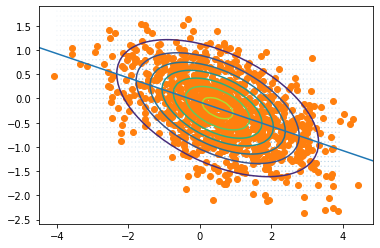

## Probabilité conditionnelle, règle de Bayes

Pour tout couple de variables $X$, $Y$, on a 
$$
p_{X,Y} (x,y) = p_{X|Y} (x)p_{Y} (y) = p_{Y|X} (y)p_{X} (x)
$$
On en déduit
$$
p_{X|Y} (x) = \frac{p_{Y|X} (y)p_{X}}{p_{Y} (y)} = \frac{p_{Y|X} (y)p_{X}}{\int p_{X,Y} (x,y) dx } = 
$$



# Loi des grands nombres et théorème central limite

**La loi des grands nombres** indique que pour une suite de variables aléatoires $x_i$ iid de moment fini, la moyenne arithmétique converge vers ce moment
$$
\frac{1}{n}\sum_{i=1}^n X_i \rightarrow \E{X}
$$
lorsque $n$ tend vers l'infini, et au sens de la convergence en probabilité ou presque sûre. 
C’est l’outil de base pour l’estimation ponctuelle en statistique. 

**Le théorème central limite** complète ce résultat en donnant quant à lui la vitesse de convergence et la loi limite. Si $X_n$, est une suite de variables aléatoires iid, d’espérance $m$ et de variance finie $\sigma^2$
et soit 
$$
S_n = X_1 + · · · + X_n 
$$
la somme partielle. Alors quand $n \rightarrow +\infty$, 
$$
\frac{S_n − nm}{\sqrt{n\sigma^2}} \Rightarrow \mathcal{N}(0, 1).
$$

- Le TCL justifie le rôle central de la loi normale $\mathcal{N}(0, 1)$
- Le TCL justifie que lorsque n est grand, on approxime la loi d’une somme de variables aléatoires iid par une loi normale 

**Exercice** 
 Illustration : générer N variables uniformes sur $[-1,1]$, et calculer la somme $S_N$ de ces variables. 
 Itérer ceci M fois en conservant ces sommes dans un vecteur S. 
 Comparer l'histogramme de S, après normalisation, avec la densité de la loi normale réduite

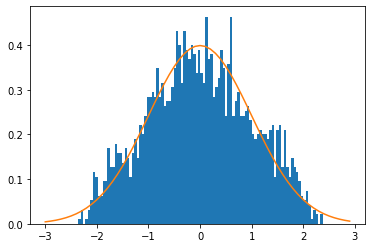

**Exercice** Extraction par moyennage. 

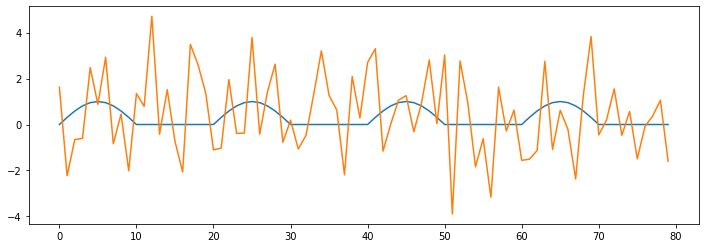

In [176]:
## extraction par moyennage 
N = 80
s0 = np.sin(2*np.pi*1/20*np.arange(20))
s0[s0<0] = 0
s = np.sin(2*np.pi*1/20*np.arange(N))
s[s<0] = 0
plt.figure(figsize=(12,4))
plt.plot(s)
z = s + 2*stats.norm.rvs(size=N) 
plt.plot(z)

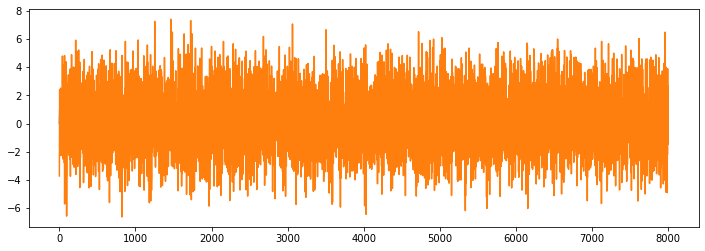

In [177]:
N = 8000
s = np.sin(2*np.pi*1/20*np.arange(N))
s[s<0] = 0
plt.figure(figsize=(12,4))
plt.plot(s)
z = s + 2*stats.norm.rvs(size=N) 
plt.plot(z)

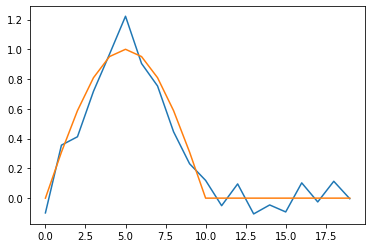

In [178]:
r = np.reshape(z,(int(N/20),20))
rm = np.mean(r, axis=0)
plt.plot(rm)
plt.plot(s0)

# Tout plein de distributions

On va se contenter de décrire et parcourir la documentation de `scipy.stats` 
[https://docs.scipy.org/doc/scipy/reference/stats.html](https://docs.scipy.org/doc/scipy/reference/stats.html)

Une description des principales distributions de probabilité et des contextes de génération ou d'utilisation sont disponibles sous wikipedia (en anglais)
[Principales distributions](https://en.wikipedia.org/wiki/Probability_distribution#Common_probability_distributions_and_their_applications)

Et [cette page](https://en.wikipedia.org/wiki/List_of_probability_distributions) est encore utile et m'évite beaucoup d'efforts. 

# Transformation de variables aléatoires

- échelle
- somme et différence de variables aléatoires
- transformation monotone
- produit et rapport de variables

### \'Echelle 

Effectons la transformation Y = a X. 
On a $f_Y(y) dy = f_X(x) dx$. Par suite, 
$$
f_Y(y) = f_X(x) \frac{dx}{dy}
$$
soit
$$
f_Y(y) = \frac{1}{|a|} f_X(\frac{y}{a}) 
$$


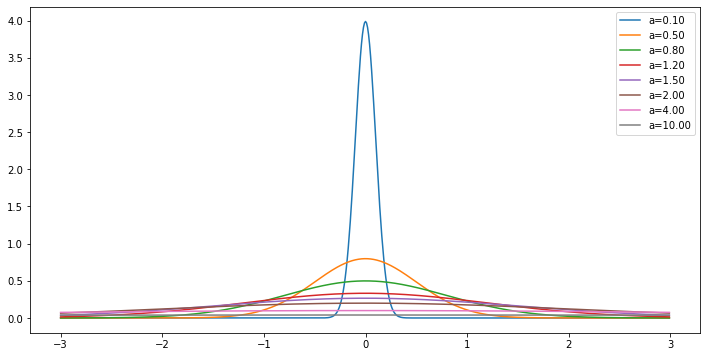

In [179]:
# Exemple 
x = np.arange(-3,3, 0.01)
plt.figure(figsize=(12,6))
for a in [0.1, 0.5, 0.8, 1.2, 1.5, 2, 4, 10]:
    plt.plot(x, stats.norm(0,a).pdf(x), label='a={:2.2f}'.format(a))
plt.legend()    

In [180]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
x = np.arange(-3,3, 0.01)
def plt_gauss(a):
    plt.plot(x, stats.norm(0,a).pdf(x), label='a={:2.2f}'.format(a))
    plt.legend()
    
interact(plt_gauss, a=widgets.FloatLogSlider(min=-2, max=1, step=0.1, value=1));

interactive(children=(FloatLogSlider(value=1.0, description='a', max=1.0, min=-2.0), Output()), _dom_classes=(…

### Somme de variables aléatoires

Soit $Z = X+Y$. La loi de la somme d'exprime comme
\begin{align}
f_Z(z) & =  \int_{x: z=x+y} f_{X,Y}(x,y) dx \\
& =  \int f_{X,Y}(x,z-x) dx 
\end{align}
Et si les deux variables sont indépendantes, alors
$$
f_Z(z)  =  \int f_{X}(x)f_Y(z-x) dx 
$$
qui n'est autre que la convolution des deux densités.

**Exercice** Somme de deux variables uniformes. Générer deux variables suivant des lois uniformes, tracer les histogrammes de chacune des variables et de leur somme. 

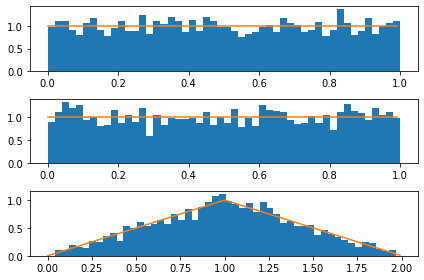

### Produit de variables aléatoires 

D'après [wiki](https://en.wikipedia.org/wiki/Product_distribution#Proof_[3])
Soit $Z = XY$
\begin{align}
F_Z(z) & \, \stackrel{\text{def}}{=}\ \mathbb{P}(Z\leq z) \\
                & = \mathbb{P}(XY\leq z) \\
                & = \mathbb{P}(XY\leq z , X \geq 0) + \mathbb{P}(XY\leq z , X \leq 0)\\
                & = \mathbb{P}(Y\leq z/X , X \geq 0) + \mathbb{P}(Y\geq z/X , X \leq 0)\\
                & = \int^{\infty}_{0} f_X \left( x \right) \int^{z/x}_{-\infty}  f_Y \left( y \right)\,  dy \,dx
                +\int^{0}_{-\infty} f_X \left( x \right) \int^{\infty}_{z/x}   f_Y \left( y \right)\,  dy \,dx
\end{align} 
On trouve la densité voulue en prenant la dérivée des deux membres par rapport à $z$
\begin{align}
 f_Z(z) & = \int^\infty_0 f_X(x)  f_Y(z/x) \frac{1}{x}\,dx
                -\int^0_{-\infty} f_X(x)  f_Y(z/x) \frac{1}{x} \,dx \\
        & = \int^\infty_0 f_X(x)  f_Y(z/x) \frac{1}{|x|}\,dx
                + \int^0_{-\infty} f_X(x)  f_Y(z/x) \frac{1}{|x|} \,dx \\
        & = \int^\infty_{-\infty} f_X(x)  f_Y(z/x)  \frac{1}{|x|}\, dx.
\end{align} 
où la valeur absolue permet de combiner les deux termes. 

Si $Z = XY$, où $x$ et $Y$ possèdent une loi jointe, alors
$$
f_Z(z) = \int^\infty_{-\infty} f_X(x)  f_Y(z/x)  \frac{1}{|x|}\, dx.
$$

**Rapport de variables aléatoires** De la même manière, on peut obtenir la loi d'un rapport $Z = X/Y$, ce qui amène à 
$$
f_Z(z) = \int^\infty_{-\infty}  {|y|} f_X(zy)  f_Y(y) \, dy.
$$

**Application** 
- Produit de deux uniformes
- Rapport d'une gaussienne et d'un chi2

### Transformation monotone d'une variable aléatoire

On a une variable $X$ de loi $p_X(x)$. On effectue la transformation $Y = g(X)$. Que vaut $p_Y(y)$ ?

- La fonction de répartition de $Y$ est donnée par 
$$
F_Y(y) = P(Y<y) = P(g(X) < y )
$$
Il faut exprimer cette probabilité en fonction de $y$, puis dériver pour obtenir la densité; 

**Exemple** : $X$ gaussien(0,1), $Y=X^2$.
On a 
\begin{align}
F_Y(y) & = P(Y<y) = P(X^2 < y ) = P(-\sqrt{y} < X < \sqrt{y} ) \\
 & = \frac{1}{\sqrt{2\pi}\sigma} \int_{-\sqrt{y}}^{\sqrt{y}} \exp{-\frac{x^2}{2\sigma^2}} dx \\
 & = 2 \frac{1}{\sqrt{2\pi}\sigma} \int_{0}^{\sqrt{y}} \exp{-\frac{x^2}{2\sigma^2}} dx \\
 & = \frac{1}{\sqrt{2\pi}\sigma} \int_{0}^{y} \frac{1}{\sqrt(u)} \exp{-\frac{u}{2\sigma^2}} du
\end{align}
où la dernière ligne résulte du changement de variable $u = x^2$, $du = 2x dx$. Enfin, en dérivant par rapport à $y$, on obtient la densité
$$
p_Y(y) = \frac{1}{\sqrt{2\pi y}\sigma}  \exp{-\frac{y}{2\sigma^2}} 
$$



**Exercice** Générer une varable gaussienne, la mettre au carré et comparer l'histogramme obtenu et la densité de probabilité de loi du $chi-2$ correspondante. 

Plus généralement, si $g$ est une fonction monotone croissante, alors
\begin{align}
F_Y(y) & = P(Y<y) = P(g(X) < y ) =  P(X <g^{-1}(y) )  \\
 & = \int_{-\infty}^{g^{-1}(y)} p_X(x) dx
\end{align}
Effectuons le changement de variable $u=g(x)$, soit $du = g'(x)dx$
\begin{align}
F_Y(y) & = \int_{-\infty}^{y} p_X(g^{-1}(u)) \frac{du}{g'\left(g^{-1}(u) \right) }
\end{align}
et en dérivant par rapport à $y$, il reste
$$
p_Y(y) = p_X\left(g^{-1}(y)\right) \frac{1} {g'\left(g^{-1}(y) \right) }
$$
Pour une fonction monote décroissante on peut faire un calcul similaire, et au final, que la fonction soit croissante ou décroissante, on a
\begin{equation}\label{eq:transvar}
p_Y(y) = p_X\left(g^{-1}(y)\right) \frac{1} {\left|g'\left(g^{-1}(y) \right) \right|}
\end{equation}

Dans le cas multivarié, on obtient une relation analogue

$$
p_{Y_1, Y_2, \ldots Y_N}(y_1, \ldots y_N) = p_{X_1, X_2, \ldots X_N}  \left( g^{-1}(y) \right) \frac{1} {\left|J(y)\right|}
$$
où $|J(y)|$ est le déterminant du Jacobien, matrice dont le terme générique $i,j$ est $dx_j/dy_i$. 


**Exemple** Soit  $X$ gaussien(0,1), que vaut la distribution de $Y=e^X$ ?

In [203]:
hide_toggle(for_next=True)

En appliquant directement (\ref{eq:transvar}), avec $g(x) = e^x$, $g'(x) = e^x$, $g^{-1} = \log$, on a 
$$p_Y(y) = p_X\left(\log(y)\right) \frac{1} { \left|e^{\log(y)} \right| }$$
soit
$$p_Y(y) = \frac{1} { \left|y \right| } p_X\left(\log(y)\right) $$
Dans le cas de la gaussienne, l'expression est donc
$$
 p_Y(y) = \frac{1}{\sqrt{2\pi}\sigma y }  \exp {\left(-\frac{\log(y)} {2\sigma^2}\right) } 
$$
qu'on appelle la loi *log-normale*. 

**Application** Déterminer la transformation $g$ telle que si $X$ suit une loi uniforme sur $[0,1]$, alors $Y = g(X)$ suit une loi *donnée* $p_Y$. 

On part de 
$$
p_Y(y) = p_X\left(g^{-1}(y)\right) \frac{1} {\left|g'\left(g^{-1}(y) \right) \right|}
$$
Si $X$ suit une loi uniforme, alors $p_X(x) = 1, \forall x \in [0,1]$
Il reste donc 
$$ 
p_Y(y) = \frac{1} {g'\left(g^{-1}(y) \right) }
$$ (en supposant $g$ monotone croissante). 
Rappelons que la [dérivée d'une fonction réciproque](https://fr.wikipedia.org/w/index.php?title=Bijection_r%C3%A9ciproque&section=13#D%C3%A9rivabilit%C3%A9) a justement la forme du terme de droite, ce qui fournit
$$ 
p_Y(y) = \frac{d}{dy} {g^{-1}(y)  }
$$ 
Par conséquent 
$$ 
 {g^{-1}(y)  } = \int_{-\infty}^y p_Y(t) dt = F_Y(y)
$$ 
et enfin
$$ 
 {g(x) } = F_Y^{-1} (x)
$$ 
La fonction recherchée est l'inverse de la fonction de répartion de la loi visée, que l'on appelle aussi la fonction quantile. 

**Fonction quantile**
Si $F_X\colon R \to [0,1]$ dénote la fonction de répartition (cdf), alors la *fonction quantile* $Q$ retourne la valeur $x$ sous laquelle une variable aléatoire tirée suivant la loi de fonction de répartition donnée tombera à $p$ pourcents du temps. 
$$
F_X(x) := \Pr(X \le x) = p.
$$
Une autre manière de voir cela est de définir $Q(p)$ par
$$
Q(p)\,=\,\inf\left\{ x\in \mathbb{R} : p \le F(x) \right\}
$$
La fonction quantile est donc l'inverse de la fonction de répartition (si celle-ci est inversible).


**Exercice** Génération de VA par répartition inverse

1. générer 300 variables aléatoires suivant une loi gaussienne (0,1) - `.rvs()` 
1. tracer la fonction de répartition d'une loi gaussienne (0,1) - `.cdf()`, et comparer la à la répartition  empirique
    - pour tracer la répartition empirique, vous pourrez utiliser
    `plt.step(np.sort(data), np.linspace(0, 1, len(data), endpoint=False))` (rationalité ?)
1. tracer la fonction de répartition *inverse* d'une loi gaussienne (0,1) - fonction quantile ou pourcentile `.ppf()` 
1. utiliser la fonction quantile pour générer des données, à partir d'une loi uniforme, en utilisant la méthode de la fonction de répartition inverse. Tracer l'histogramme et comparez le à une densité gaussienne



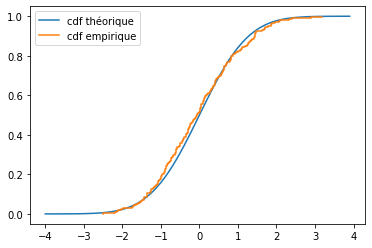

In [182]:
# 1 et 2
dist = stats.norm(0,1)
data = dist.rvs(300)



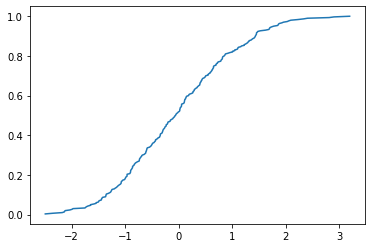

In [183]:
# NB - la fonction de répartition empirique est aussi disponible ici
import statsmodels.distributions as sm
d = sm.empirical_distribution.ECDF(data)
plt.plot(d.x, d.y)

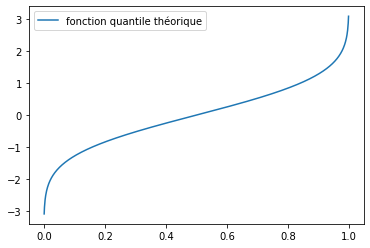

In [184]:
# 3

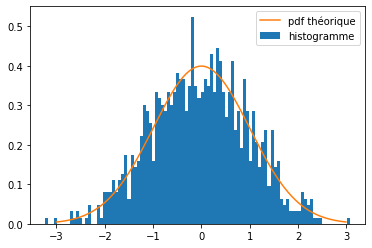

In [185]:
# 4 

###  Autre exercice : Génération par répartition inverse d'une loi quelconque

In [186]:
testpdf = lambda x: 1/500*(x+0.2*x**2)*np.exp(-0.1*x)
# https://www.wolframalpha.com/input/?i=(x%2B0.2*x**2)*exp(-0.1*x)+dx%2C+x%3D0..infinity
testcdf = lambda y: np.exp(-0.1*y)*(-1 + np.exp(0.1*y) - 0.1*y - 0.004*y**2)
# https://www.wolframalpha.com/input/?i=1%2F500*(x%2B0.2*x**2)*exp(-0.1*x)+dx%2C+x%3D0..y


In [187]:
import matplotlib.pyplot as plt

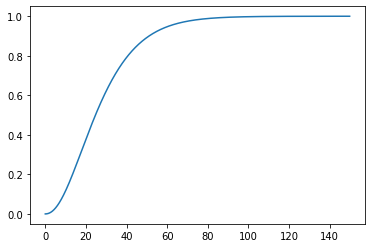

In [188]:
%matplotlib inline
x=np.arange(0,150, 0.1)
plt.plot(x,testcdf(x))

In [224]:
# https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
def my_find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx, array[idx]

x=np.arange(0,150, 0.1)
empcdf = testcdf(x)
invcdf = lambda y: x[my_find_nearest(empcdf, y)[0]]

In [225]:
def testrvs(size=1):
    rvs = np.empty(size)
    u = stats.distributions.uniform(0,1).rvs(size=size)
    for n, y in enumerate(u): 
        rvs[n] = invcdf(y)
    return rvs    

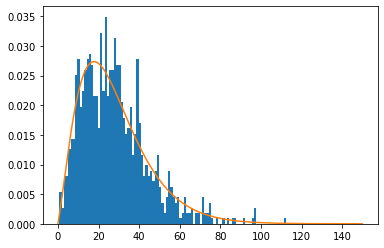

In [226]:
z = testrvs(1000)
_ = plt.hist(z,100, density=True)
plt.plot(x,testpdf(x))

# Tester une distribution, estimer ses paramètres

- méthode des moments
- vraisemblance et maximum de vraisemblance
- t-test, ks-test à 1 ou 2 échantillons

## Méthode des moments

Soit des données suivant une distribution de probabilité connue. 
On se pose la question d'estimer les paramètres de cette distribution (*spoiler* sur le cours d'estimation). 

Lorsqu'une distribution dépend de paramètres, ses moments dépendent forcément des paramètres en question. 
Il s'agira alors simplement d'estimer les moments en question, et d'en déduire, via un système d'équations, les paramètres de la loi. 

- Exemple : loi gaussienne. Les paramètres sont la moyenne et la variance, que l'on peut directement estimer à partir des données. 
Exemple : loi Gamma. 
\begin{align}
f(x;\alpha,\beta) & = \frac{ \beta^\alpha x^{\alpha-1} e^{-\beta x}}{\Gamma(\alpha)} \quad \text{ for } x > 0 \quad \alpha, \beta > 0, \\
\end{align}

Les paramètres sont $\alpha$ et $\beta$ (*shape* et *rate*). Les moments s'expriment comme
$$
\E{X^k} = \dfrac{\beta^{-k} \Gamma(k + \alpha)}{\Gamma(\alpha)}
$$

Dès lors, on a 
- $\E{X} = \alpha/\beta$
- $\E{X^2} = \alpha(\alpha+1)/\beta^2$
- $\text{var}\left[X \right] = \E{X^2} - \E{X}^2 = \alpha/\beta^2$ 

On en déduit par exemple
- $\beta = \E{X} / \text{var}\left[X \right]$
- $\alpha = \E{X}^2 / \text{var}\left[X \right]$

In [192]:
x = stats.gamma(2,loc=0, scale=1/3).rvs(2000)
m = np.mean(x)
v = np.var(x)
print("alpha  : {:2.2f}, beta : {:2.2f}".format(m**2/v, m/v))
# scale = 1/β

alpha  : 1.98, beta : 2.96


## Maximum de vraisemblance
(*spoiler*)

Le maximum de vraisemblance consiste à écrire la probabilité de l'échantillon, en fonction des paramètres de la loi, et à rechercher la valeur de ces paramètres de sorte à ce que cette probabilité soit la plus élevée possible.

Si on dispose d'un échantillon $x_1, x_2, \ldots x_N$, la (densité de) probabilité de cet échantillon est 
$$
p(x_1, x_2, \ldots x_N).
$$
On appelle *vraisemblance* du jeu de données cette expression. Cette  loi dépend de paramètres (par exemple $\alpha$ et $\beta$ pour une loi gamma). La méthode du maximum de vraisemblance consiste simplement à rechercher le jeu de paramètres qui permet de rendre maximale la vraisemblance, c'est-à-dire de maximiser la probabilité d'avoir observé les données  $x_1, x_2, \ldots x_N$. 

Si les différentes variables sont indépendantes et identiquement distribuées, alors la loi jointe devient une loi produit : 
$$
p(x_1, x_2, \ldots x_N) = p(x_1)p(x_2) \ldots p(x_N) = \Pi_{i=1}^N  p(x_i) 
$$
Souvent, plutôt que de maximiser la vraisemblance, on maximisera son logarithme (car il s'exprime sous la forme d'une somme), la *log-vraisemblance*
$$
 \sum_{i=1}^N  \log p(x_i) 
$$
ou on minimisera son opposé
$$
 - \sum_{i=1}^N \log p(x_i) 
$$

**Exercice (papier)** Soit une loi exponentielle de paramètre $\lambda$. Ecrire la log-vraisemblance d'un $N$-échantillon et la minimiser de sorte à estimer $\lambda$. 

**Exercice (machine)**. Soit la loi `testpdf` que nous avons définie plus haut. Elle a la forme générique suivante
$$
p_X(x) =  \frac{a^3}{(a+2b)} (x+bx^2)\,e^{-ax}
$$
Ecrire une fonction `LV` qui calcule la log vraisemblance pour un vecteur de données $x$ et en rechercher le minimum via la fonction `minimize` de `scipy.optimize import minimize`.  Tester ceci sur les données $z$ ci-dessous; 

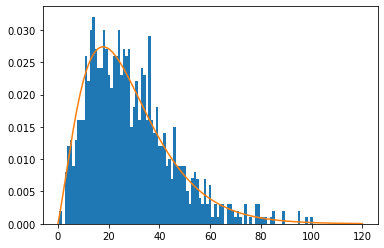

In [227]:
z = testrvs(1000)
_ = plt.hist(z,100, density=True)
x = np.linspace(0, 120, 200)
plt.plot(x,testpdf(x))
# -----------------------------------

In [228]:
#normalisation https://www.wolframalpha.com/input/?i=(x%2Bb*x**2)*exp(-|a|*x)+dx%2C+x%3D0..infinity
pdfaopt = lambda a,b,x: a**3/(a+2*b)*(x+b*x**2)*np.exp(-a*x)
mylog = lambda x: -1e-99 if x<0 else np.log(x)        
mylog = lambda x: np.log(x)        
logpdfaopt = lambda a,b,x: mylog(a**3/(a+2*b)) + mylog((x+b*x**2))-a*x

      fun: 4125.870083040763
 hess_inv: array([[ 4.78152550e-06, -3.19935729e-04],
       [-3.19935729e-04,  4.91020172e-02]])
      jac: array([-0.00537109, -0.00012207])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 172
      nit: 21
     njev: 54
   status: 2
  success: False
        x: array([ 0.1016834 , -0.45815075])

## Test de Kolmogorov-Smirnov

**Le test de Kolmogorov-Smirnov** repose sur une propriété de convergence de la fonction de répartion empirique $F_n(x)$ vers la véritable fonction de répartition $F(x)$. On note $Dn$ le maximum de l'écart entre la fonction de répartition empirique et la véritable fonction de répartition
$$
D_n= \sup_x |F_n(x)-F(x)|
$$
La distribution de Kolmogorov est la loi de la variable $K=\sup_{t\in[0,1]}|B(t)|$, où $B(t)|$ est un "pont Brownien".
Sa fonction de répartition est donnée par
$$
\operatorname{Pr}(K\leq x)=1-2\sum_{k=1}^\infty (-1)^{k-1} e^{-2k^2 x^2}=\frac{\sqrt{2\pi}}{x}\sum_{k=1}^\infty e^{-(2k-1)^2\pi^2/(8x^2)}
$$
Sous l'hypothèse $H_0$ que les données proviennent de la distribution $F(x)$,
$$
\sqrt{n}D_n\xrightarrow{n\to\infty}\sup_t |B(F(t))|
$$
et $\sqrt{n}D_n$ converge vers la distribution de Kolmogorov, qui est indépendante de la fonction de répartition $F$ mise en jeu, c'est-à-dire finalement de la loi des données. 

Dès lors, on peut tester si la valeur observée de $\sqrt{n}D_n$ a une probabilité "raisonnable" de se produire. On définit $K_\alpha$ la valeur telle que
$$
\operatorname{Pr}(K\leq K_\alpha)=1-\alpha.\,
$$
avec par exemple $\alpha = 0.05$, ceci fournit une proba de 0.95 que $K\leq K_\alpha$. Dès lors, on peut construire le test
$$
\sqrt{n}D_n>K_\alpha,
$$
qui, s'il est vérifié, signifie que l'on rejette l'hypothèse "*les données proviennent de la distribution $F(x)$*" au niveau $\alpha$. La probabilité 
$$
\operatorname{Pr}(K\geq \sqrt{n}D_n)
$$
est la *$p$-value*. C'est la probabilité d'avoir une valeur supérieure ou égale à celle observée sous l'hypothèse $H_0$. Des fortes valeurs peuvent parfaitement se produire ou pas si l'hypthèse est valide, par contre \underline{des faibles valeurs jettent un doute sur la validité de l'hypothèse}. 

Dans `scipy.stats`, le test de KS est implanté sous le nom de `kstest` ou de `ks_1samp`. Il prend en argument les données, la fonction de répartition théorique, et éventuellement les paramètres de cette cdf.  

In [236]:
np.random.seed(120)
t = stats.t
stats.ks_1samp(t(2).rvs(400),t.cdf,args=[2])

KstestResult(statistic=0.04129417554133474, pvalue=0.4898183768292397)

In [237]:
stats.kstest(t(2).rvs(400),t.cdf,args=[2])

KstestResult(statistic=0.032671150063909526, pvalue=0.7739436630486468)

In [ ]:
np.random.seed(120)
stats.ks_1samp(t(2).rvs(400),t(2).cdf)

In [ ]:
# jouer avec les paramètres et le nombre d'échantillons
stats.ks_1samp(stats.t(1).rvs(size=200), stats.t(1).cdf)

**Exercice** Reprendre l'exercice sur la loi de la somme de variables aléatoires, 
où on a examiné la convergence vers une loi gaussienne réduite, et tester  la gaussiannité avec KS, en fonction du nombre de termes dans la somme.  

In [ ]:
# Exo : reprendre l'exercice sur la loi de la somme de variables aléatoires,
# où on a examiné la convergence vers une loi gaussienne réduite, et tester 
# la gaussiannité avec KS, en fonction du nombre de termes dans la somme 

Nmax = 500
p = 5
NN = range(1, Nmax,p)
ks = np.empty(Nmax)


**KS test à deux échantillons**. De manière similaire à ce qui précède, il est possible d'utiliser un test de l'hypothèse selon laquelle deux échantillons proviennent d'une même distribution initiale. 

Soit un échantillon $X_1$ et un autre échantillon $X_2$, la question est de savoir si ces deux jeu de données ont été engendrés suivant la même loi ou pas..

In [196]:
#Exemple 
stats.ks_2samp(stats.norm(0,1).rvs(50), stats.norm(0,1).rvs(50))

KstestResult(statistic=0.08, pvalue=0.9977109764909107)

In [197]:
#Exemple 
stats.ks_2samp(stats.norm(0,1).rvs(50), stats.norm(1,1).rvs(50))

KstestResult(statistic=0.48, pvalue=1.3867885687360081e-05)

In [198]:
#Exemple 
stats.ks_2samp(stats.norm(0,1).rvs(50), stats.norm(0,2).rvs(50))

KstestResult(statistic=0.28, pvalue=0.039194586195352224)

In [199]:
#Exemple 
stats.ks_2samp(stats.norm(1,6).rvs(50), stats.t(1).rvs(50))

KstestResult(statistic=0.28, pvalue=0.039194586195352224)